Let us consider a supermarket has several outlets or several stores around the world & they want us to predict the sales which they can expect.

APPLICATION OF PREDICTING THE SALES:

We can tell the company what are all the challenges they may face

What are the brands or products which is sold the most & other such kind of things

This helps sales team to understand which product to sell & which product to promote & other such kind of things

They can also make several marketing plans(let's say that a particular product in a particular store is getting sold the most & we may find some insights from it - as of why this product is getting sold the most & this helps the company to make better marketing decisions)


In [81]:
#Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Loading the Dataset

In [82]:
sales_data = pd.read_csv('/content/Train.csv')

In [83]:
#Displaying first 5 rows of data
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
# checking the number of data points(different products present in the dataset) & number of features
sales_data.shape



(8523, 12)

In [85]:
# getting some information about the dataset
sales_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [86]:
# checking for missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can observe that we are having 976 missing values in the Item_Weight column & we are having about 1606 missing values in the Outlet_Size column

IN ORDER TO DEAL WITH THE MISSING VALUES





Replacing the missing values in the "Item_Weight"column

In [87]:
# mean value of "Item_Weight" column
sales_data['Item_Weight'].mean()

12.857645184135976

In [88]:
# filling the missing values in "Item_weight column" with "Mean" value
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)



Replacing the missing values in the "Outlet_Size"column

In [89]:
# mode of "Outlet_Size" column
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [90]:
# filling the missing values in "Outlet_Size" column with Mode
#Here we take Outlet_Size column & Outlet_Type column since they are correlated
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))



In [91]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  




From the above pivot table, we can observe that

  If the outlet type is Grocery Store in most of the cases the outlet size(mode) is Small
  If the outlet type is Supermarket Type1 in most of the cases the outlet size(mode) is Small
  If the outlet type is Supermarket Type2 in most of the cases the outlet size(mode) is Medium
  If the outlet type is Supermarket Type3 in most of the cases the outlet size(mode) is Medium



In [92]:
miss_values = sales_data['Outlet_Size'].isnull()

In [93]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


False represents it is not null that means the value is present

True represents a particular value is missing


In [94]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [95]:
# checking for missing values
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Thus we don't have any missing values in a numerical column & a categorical column

ANALYSING THE DATA

In [96]:
#stastical measures about the data
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800




DATA VISUALIZATION

Data visualization is the graphical representation of information and data.
It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns



VISUALIZATION OF NUMERICAL FEATURES

<ipython-input-97-1e53105c21a2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'], color='purple')


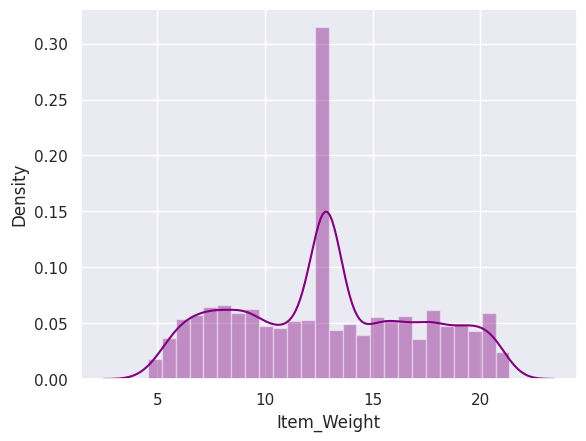

In [97]:
sns.set()


# Item_Weight distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Weight'], color='purple')
plt.show()



Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

Therefore in this dataset, the average weight is about 12.8 Kg



<ipython-input-98-a9af7ada1431>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'], color='purple')


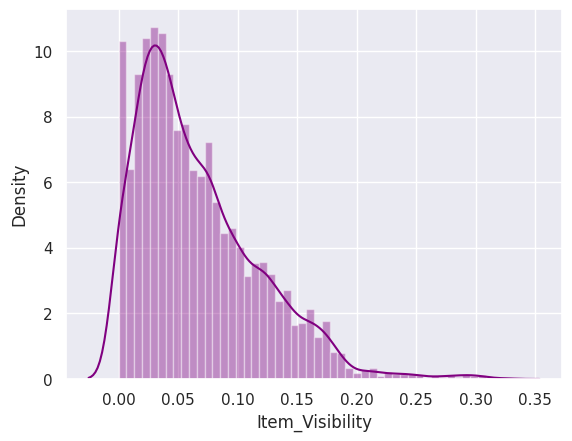

In [98]:
# Item Visibility distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Visibility'], color='purple')
plt.show()

Hence from the above graph we can observe that Item_Visibility feature is positively skewed



<ipython-input-99-f45456860c71>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'], color='purple')


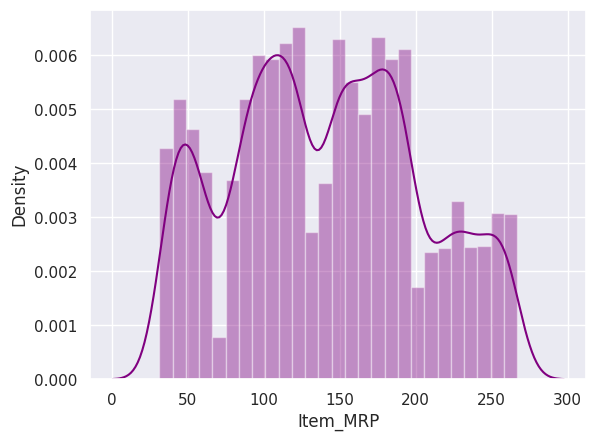

In [99]:
# Item MRP distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_MRP'], color='purple')
plt.show()

From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products

Hence we have more products in the range of 100 MRP - 180 MRP



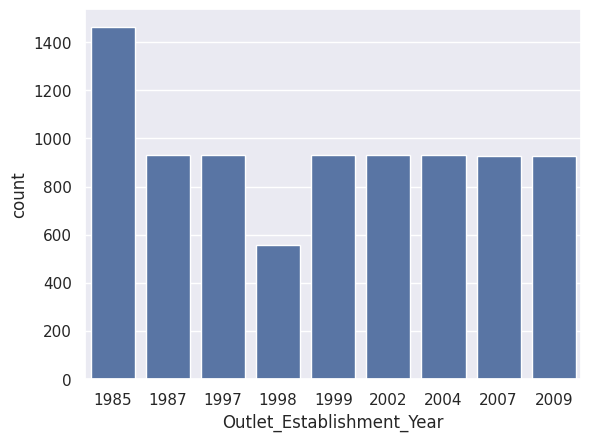

In [100]:
# Outlet_Establishment_Year column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year', data=sales_data)
plt.show()

Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009

Therefore these are the years on which different outlets or different stores have been established

We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same



VISUALIZATION OF CATEGORICAL FEATURES

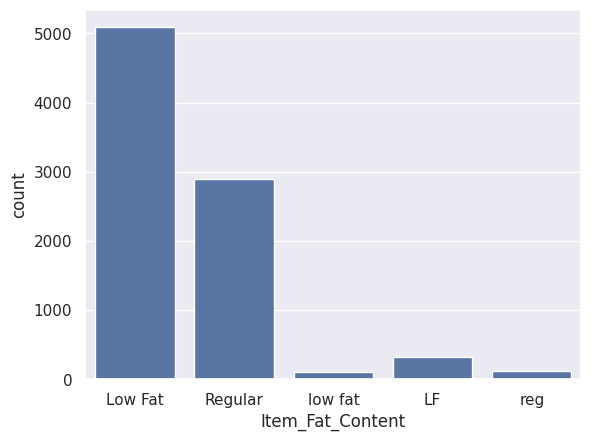

In [101]:
# Item_Fat_Content column
#plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=sales_data)
plt.show()

From the above graph we can observe that the data in the Item_Fat_Content column has to be cleaned since we have columns such as Low fat,low fat & Lf which is same & must be put into a single particular label.Similarly we have Regular & reg where we need to put this into a single entity.

Hence, we need to pre process this data so we will be dealing with this in a later point of time after the visualization of the data



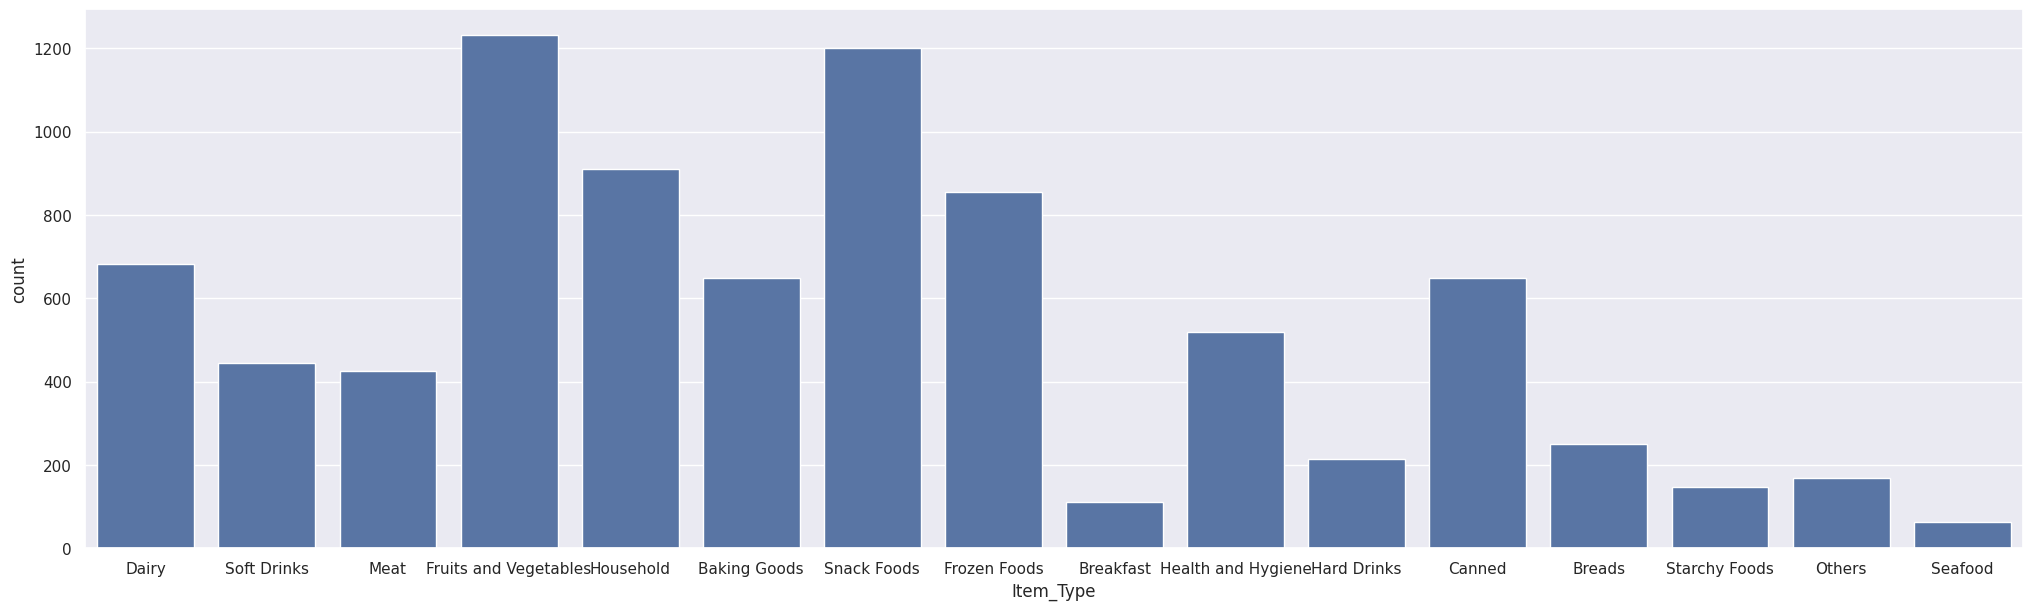

In [102]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=sales_data)
plt.show()

From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc

Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column



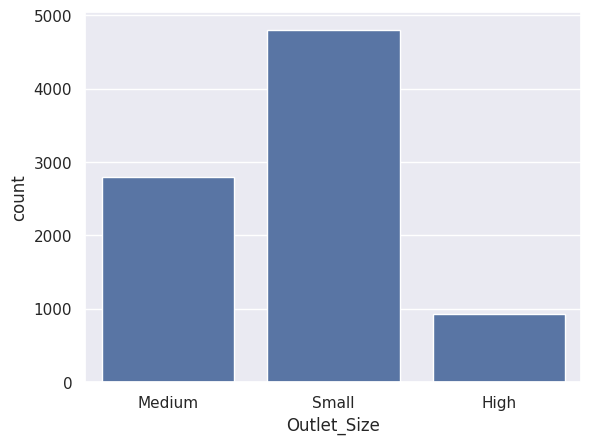

In [103]:
# Outlet_Size column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=sales_data)
plt.show()

From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high

PRE-PROCESSING OF DATA

In [104]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [105]:
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [106]:
sales_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [107]:
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Hence, we have successfully cleaned the data in Item_Fat_Content column



LABEL ENCODING:

Label Encoding refers to the convertion of the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In simple terms, taking all the categorical values & transforming them into some numerical values



In [108]:
encoder = LabelEncoder()

In [109]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [110]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052



Hence, we have only numerical values in our data where these categories are given some specific numerical values if it is unique

Therefore we have successfully encoded categorical columns into numerical values which is an important data preprocessing step.



SPLITTING FEATURES AND TARGET INTO X & Y RESPECTIVELY

We know that the data in the "Item_Outlet_Sales" column is the target & remaining are the features


In [111]:
#Let's have all the features in X & target in Y
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = sales_data['Item_Outlet_Sales']

In [112]:
# X contains features
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [113]:
# Y contains target
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [115]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


MACHINE LEARNING MODEL



MACHINE LEARNING MODEL TRAINING - XGBoost Regressor

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.


In [116]:
regressor = XGBRegressor()

In [117]:
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

EVALUATION

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.


In [118]:
sales_data_prediction = regressor.predict(X_train)

In [119]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8762174618111388


In [120]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [121]:
# R squared Value
r2_data = metrics.r2_score(Y_test, data_prediction)

In [122]:
print('R Squared value = ', r2_data)

R Squared value =  0.5017253991620692


BUILDING A PREDICTIVE SYSTEM

Building a predictive system inorder to find the sales for the first product from the dataset



In [123]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
#input_data_as_numpy_array = np.asarray(input_data)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction = regressor.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])
print("The sales for the first product in the dataset is predicted as ", sales_data_prediction[0])

The sales for the first product in the dataset is predicted as  2241.8008


In [124]:
print("Thus we have built the model to predict the sales & have performed the evaluation successfully")

Thus we have built the model to predict the sales & have performed the evaluation successfully
